# Clustring(airlines)

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

# Load dataset

In [2]:
airl=pd.read_excel(r"D:\Excelr\assignments\Clustering\EastWestAirlines (1).xlsx",sheet_name='data')

In [3]:
airl

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airl.shape

(3999, 12)

In [5]:
airl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
airl.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
# Count of duplicates rows
airl[airl.duplicated()].shape

(0, 12)

# HIERARCHICAL

In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
airl1=(airl.iloc[:,1:])
airl1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
# Normalized data frame (considering the numerical part of data)
airl1_norm = norm_func(airl1.iloc[:,1:])

In [11]:
airl1_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


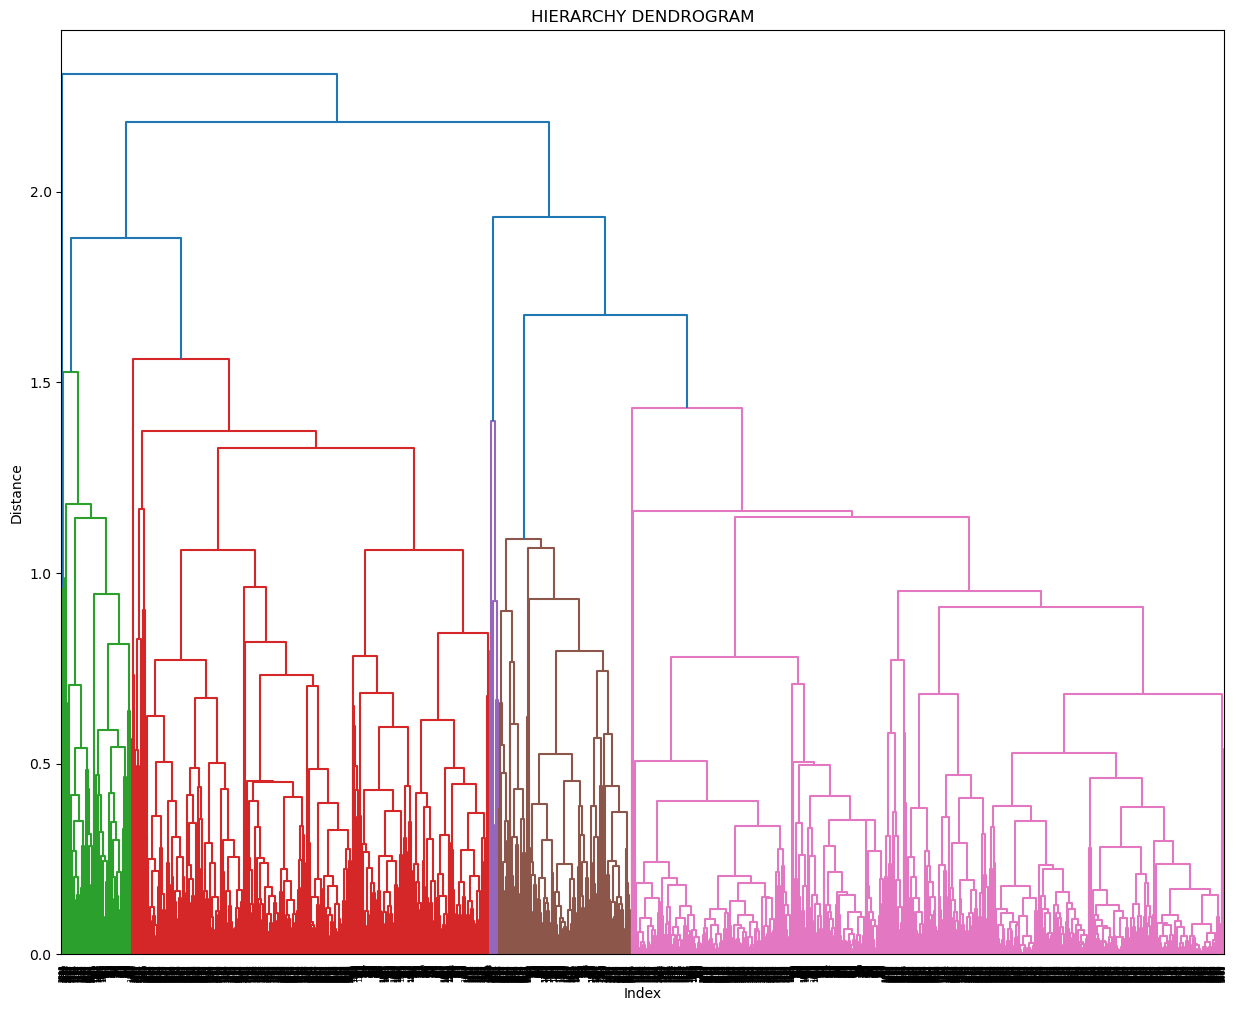

In [12]:
plt.figure(figsize=(15,12));plt.title('HIERARCHY DENDROGRAM');plt.xlabel('Index');plt.ylabel('Distance')
dendograms=sch.dendrogram(sch.linkage(airl1_norm,"complete"))
plt.show()

In [13]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [14]:
hc

AgglomerativeClustering(linkage='single', n_clusters=3)

In [15]:
# save clusters for chart
y_hc = hc.fit_predict(airl1_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [16]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


# K-MEANS

In [17]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

<AxesSubplot:xlabel='X', ylabel='Y'>

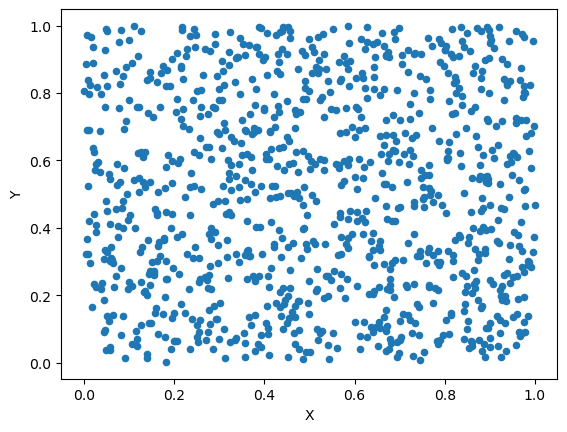

In [18]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [19]:
X = np.random.uniform(0,1,1000)
X

array([8.50135056e-01, 7.04342347e-01, 4.90291311e-01, 7.50014985e-01,
       3.23286395e-01, 2.08396721e-01, 7.30275260e-01, 3.46959647e-01,
       5.89326104e-01, 2.85767465e-02, 1.03090489e-01, 5.61915491e-01,
       2.41803122e-01, 7.74699910e-01, 1.58927908e-01, 8.74440885e-01,
       9.10356356e-01, 8.77225993e-01, 1.56913416e-01, 7.12125656e-01,
       8.04695783e-01, 8.10324559e-01, 5.30229343e-01, 4.42009527e-01,
       4.85268997e-02, 5.97703144e-01, 8.85758126e-01, 9.15905447e-01,
       4.29794063e-01, 6.52570211e-01, 1.20308506e-01, 8.09063478e-01,
       7.79027510e-02, 5.55683793e-02, 4.39986695e-01, 2.69749309e-01,
       2.37364180e-01, 8.43744008e-01, 6.59659714e-01, 4.36020660e-01,
       1.65126099e-01, 2.62760450e-01, 5.28774996e-02, 1.28477783e-01,
       5.33874824e-01, 6.53346555e-01, 9.23909610e-01, 3.78993989e-01,
       3.90010589e-02, 8.83614840e-01, 1.53198053e-01, 2.57855424e-01,
       8.00848031e-01, 4.64916936e-01, 3.61761021e-01, 2.79612614e-01,
      

<AxesSubplot:xlabel='X', ylabel='Y'>

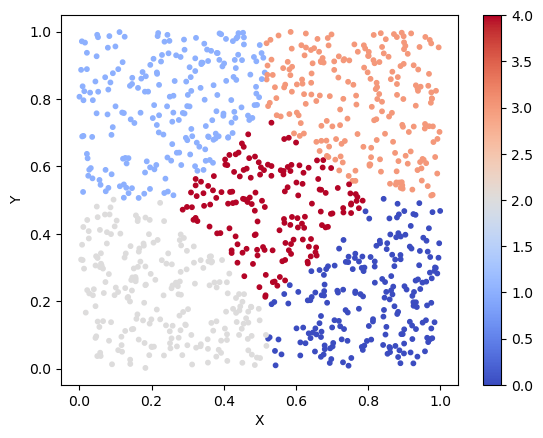

In [20]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [21]:
airl=pd.read_excel('D:\EXCLER solution\data set\Clustering\EastWestAirlines.xlsx',sheet_name='data')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\EXCLER solution\\data set\\Clustering\\EastWestAirlines.xlsx'

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airl.iloc[:,1:])


df_norm.head(10)  # Top 10 rows

In [ ]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row

In [ ]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
airl['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

In [ ]:
airl.iloc[:,1:7].groupby(airl.clust).mean()

In [ ]:
airl.head()

In [ ]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_norm)
    Wcss.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,11),Wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

# DBSCAN

In [ ]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import .csv file and convert it to a DataFrame object
airl=pd.read_excel('D:\EXCLER solution\data set\Clustering\EastWestAirlines.xlsx',sheet_name='data')

print(airl.head())

In [ ]:
print(airl.info())

In [ ]:
airl.drop(['ID#','Award?'],axis=1,inplace=True)

In [ ]:
airl

In [ ]:
array=airl.values

In [ ]:
array

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [ ]:
X

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(X)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl

In [ ]:
pd.concat([airl,cl],axis=1)